<a href="https://colab.research.google.com/github/ShireenKachroo/Mushroom-Classification-Model/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mushroom Classification Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# load dataset
data = pd.read_csv("mushrooms.csv")
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

Dataset Shape: (8124, 23)

First 5 rows:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w               

In [4]:
# preprocess---> all columns are categorical, encode them
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

X = data.drop("class", axis=1)  # features
y = data["class"]               # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




=== Logistic Regression ===
Accuracy: 0.9499589827727646
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1257
           1       0.95      0.94      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



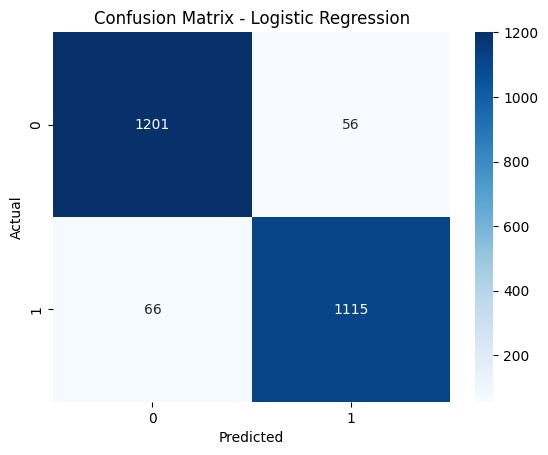


=== Decision Tree ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



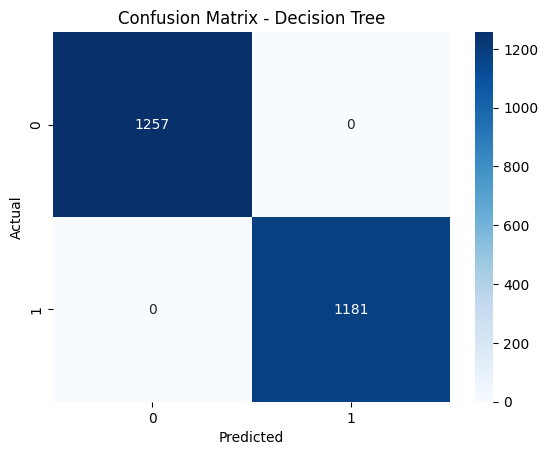


=== Random Forest ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



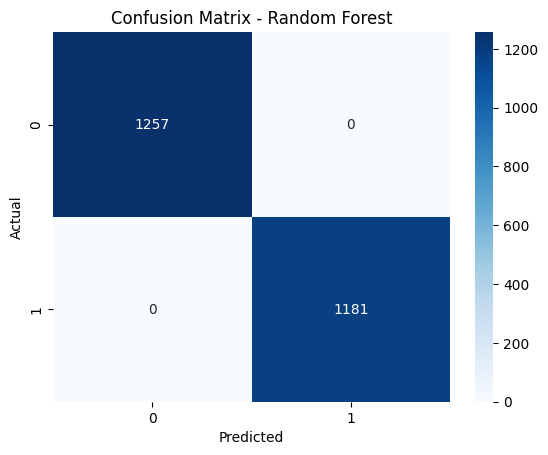

In [8]:
# model training

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Model Comparison:
Logistic Regression: 0.9495
Decision Tree: 1.0000
Random Forest: 1.0000


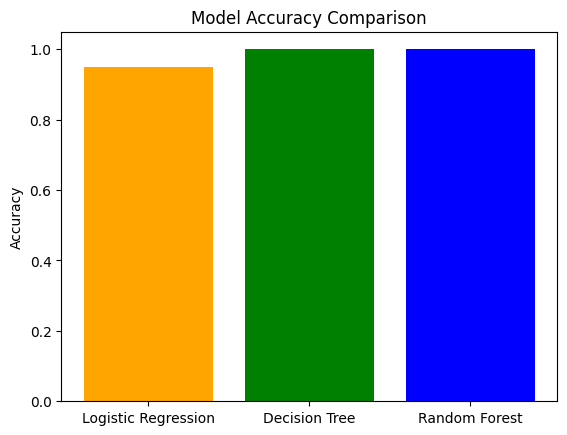

In [6]:
# model comparision
print("\nModel Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

plt.bar(results.keys(), results.values(), color=['orange','green','blue'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [7]:
# insights
print("\nConclusions:")
print("1. Best Model: Usually Random Forest gives highest accuracy.")
print("2. Fastest Model: Logistic Regression trains fastest.")
print("3. Most Interpretable: Decision Tree is easiest to interpret.")
print("4. When to use: ")
print("   - Logistic Regression: when speed & interpretability matter.")
print("   - Decision Tree: when interpretability is crucial.")
print("   - Random Forest: when accuracy is top priority.")



Conclusions:
1. Best Model: Usually Random Forest gives highest accuracy.
2. Fastest Model: Logistic Regression trains fastest.
3. Most Interpretable: Decision Tree is easiest to interpret.
4. When to use: 
   - Logistic Regression: when speed & interpretability matter.
   - Decision Tree: when interpretability is crucial.
   - Random Forest: when accuracy is top priority.
